In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install pandas-flavor

In [3]:
from pandas_flavor import register_dataframe_method

@register_dataframe_method
def missing(df):
        return sorted(
                    [(col,str(df[col].dtypes),np.round(df[col].isna().sum()/len(df) * 100,2)) for col in df.columns if df[col].isna().sum() !=0 ],
                    key = lambda x: x[2], reverse=True)
    
@register_dataframe_method
def get_numeric_df(df):
    return df.select_dtypes(np.number)

@register_dataframe_method
def get_numeric_col_names(df):
    return list(df.select_dtypes(np.number).columns)

@register_dataframe_method
def discrete_features(df,thresold):
#     thresold in number of unique values
    return [feature for feature in df.columns if len(df[feature].unique()) < thresold]

@register_dataframe_method
def continious_features(df,thresold):
    #     thresold in number of unique values
    return [feature for feature in df.columns if len(df[feature].unique()) >= thresold]

@register_dataframe_method
def about(df):
    print('shape of data')
    print(df.shape)
    print("=="*50)
    
    print(f"Datatypes in data\n{df.dtypes.value_counts(ascending=False)}")
    print("=="*50)
    
    
    print("Percentage of missing values")
    print(*missing(df),sep="\n")
    print("=="*50)

    print('data description \n')
    display(df.describe().T)
    print("=="*50)
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/House%20Prices%20-%20Advanced%20Regression%20Techniques/train.csv")

df.drop(['Id'],axis=1,inplace=True)
df.about()

shape of data
(1460, 80)
Datatypes in data
object     43
int64      34
float64     3
dtype: int64
Percentage of missing values
('PoolQC', 'object', 99.52)
('MiscFeature', 'object', 96.3)
('Alley', 'object', 93.77)
('Fence', 'object', 80.75)
('FireplaceQu', 'object', 47.26)
('LotFrontage', 'float64', 17.74)
('GarageType', 'object', 5.55)
('GarageYrBlt', 'float64', 5.55)
('GarageFinish', 'object', 5.55)
('GarageQual', 'object', 5.55)
('GarageCond', 'object', 5.55)
('BsmtExposure', 'object', 2.6)
('BsmtFinType2', 'object', 2.6)
('BsmtQual', 'object', 2.53)
('BsmtCond', 'object', 2.53)
('BsmtFinType1', 'object', 2.53)
('MasVnrType', 'object', 0.55)
('MasVnrArea', 'float64', 0.55)
('Electrical', 'object', 0.07)
data description 



,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [4]:
missing_val = df.missing()
missing_val

[('PoolQC', 'object', 99.52),
 ('MiscFeature', 'object', 96.3),
 ('Alley', 'object', 93.77),
 ('Fence', 'object', 80.75),
 ('FireplaceQu', 'object', 47.26),
 ('LotFrontage', 'float64', 17.74),
 ('GarageType', 'object', 5.55),
 ('GarageYrBlt', 'float64', 5.55),
 ('GarageFinish', 'object', 5.55),
 ('GarageQual', 'object', 5.55),
 ('GarageCond', 'object', 5.55),
 ('BsmtExposure', 'object', 2.6),
 ('BsmtFinType2', 'object', 2.6),
 ('BsmtQual', 'object', 2.53),
 ('BsmtCond', 'object', 2.53),
 ('BsmtFinType1', 'object', 2.53),
 ('MasVnrType', 'object', 0.55),
 ('MasVnrArea', 'float64', 0.55),
 ('Electrical', 'object', 0.07)]

In [5]:
drop_me = [i[0] for i in missing_val if i[2]>15]
drop_me

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']

In [6]:
df.drop(drop_me,axis=1,inplace=True)
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [7]:
discrete = df.discrete_features(thresold=50)
print(discrete)

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [8]:
len(discrete)

56

In [9]:
continious = df.continious_features(thresold=50)
continious

['LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [10]:
len(continious)

18

In [11]:
df["YrSold"].unique()

array([2008, 2007, 2006, 2009, 2010])

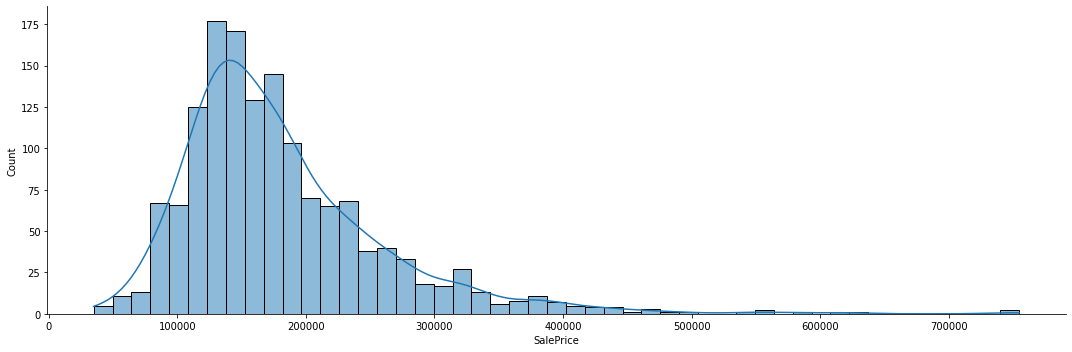

In [12]:
sns.displot(df['SalePrice'],kde=True,aspect=3)

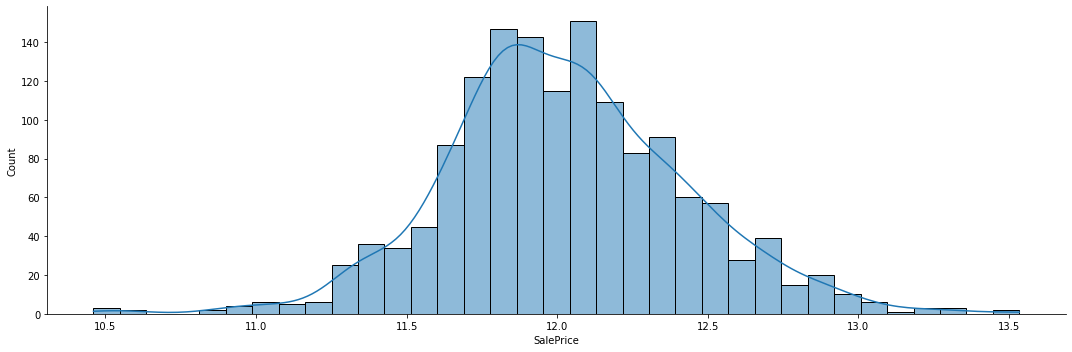

In [13]:
df['SalePrice'] = np.log(df['SalePrice'])
sns.displot(df['SalePrice'],kde=True,aspect=3)

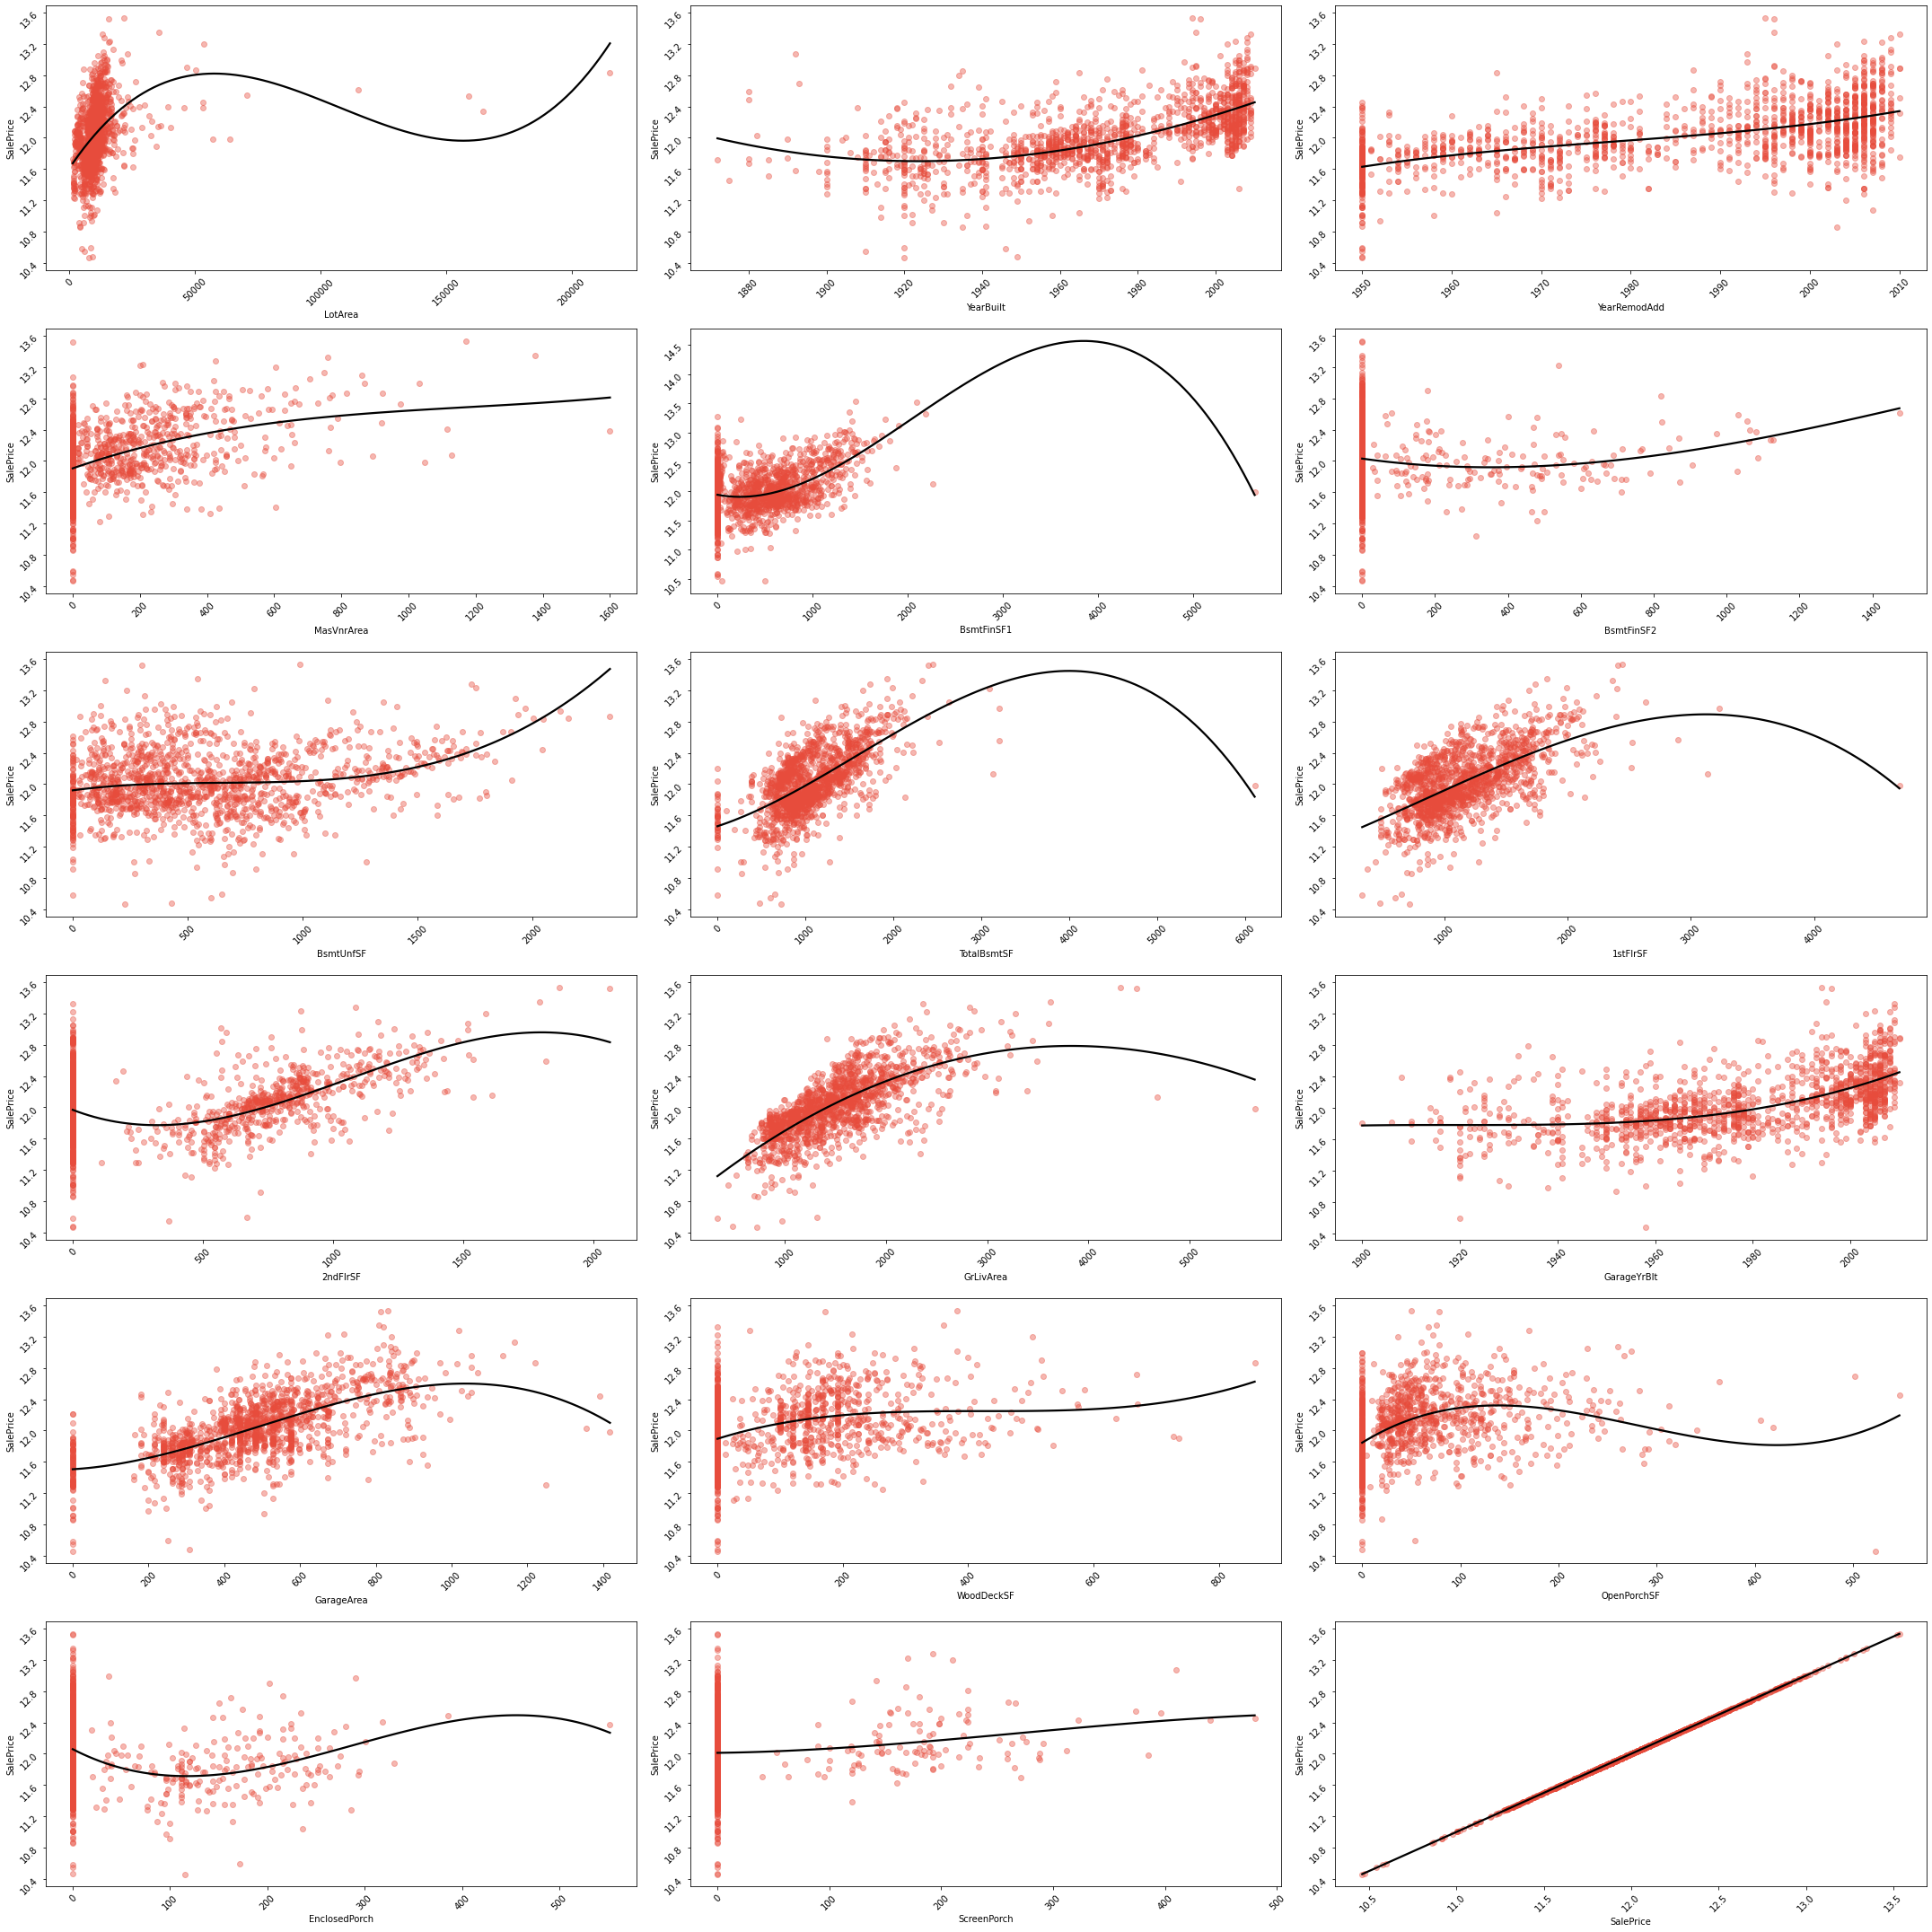

In [14]:

from matplotlib.ticker import MaxNLocator

def srt_reg(y, df,x_size=30,y_size=30):
    
    ncols = 3
    nrows = int(np.ceil(df.shape[1]/ncols))
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(x_size,y_size))
    axes = axes.flatten()

    for i, j in zip(df.columns, axes):

        sns.regplot(x=i,
                    y=y,
                    data=df,
                    ax=j,
                    order=3,
                    ci=None,
                    color='#e74c3c',
                    line_kws={'color': 'black'},
                    scatter_kws={'alpha':0.4})
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=10))

        plt.tight_layout()
def srt_box(y, df):
    fig, axes = plt.subplots(19, 3, figsize=(30,30))
    axes = axes.flatten()

    for i, j in zip(df.columns, axes):

        sortd = df.groupby([i])[y].median().sort_values(ascending=False)
        sns.boxplot(x=i,
                    y=y,
                    data=df,
                    palette='plasma',
                    order=sortd.index,
                    ax=j)
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=18))

        plt.tight_layout()
srt_reg('SalePrice',df[continious])